# Multilayer Perceptron Visualization
### Joseph Coston & Douglas Newquist
Final Project for CSE 489 Machine Learning

11/13/2021

In [46]:
# standard imports
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# project imports
import generator
import mlp

In [47]:
# generate some random datapoints
N = 100
pc = generator.pointCloud2D(f = lambda x,y : (x+y-1 > 0), n=N)

Text(0.5, 0.98, 'Actual Point Output Values')

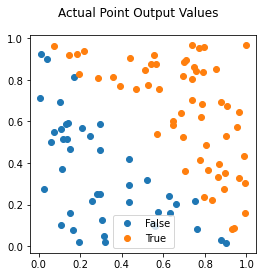

In [48]:
# plot the liearly separable distribution
fig, ax = pc.to_fig()
fig.suptitle('Actual Point Output Values')

In [49]:
# Example linear perceptron describing the line (x + y > 0)
s1 = mlp.Neuron([1,1.5], lambda x: x > 0, 0)
s1.evaluate((pc.data['x'][0],pc.data['y'][0]))

True

In [50]:
# visualize the output space
def visualize(o, dim, scale, mode='flatten'):
    if isinstance(o,mlp.Neuron):
        plt.imshow(np.array(o.get_matrix(dim, scale)).T, origin='lower')
    elif isinstance(o, mlp.Layer):
        plt.imshow(np.array(o.get_matrix(dim, scale, mode)).T, origin='lower')
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.locator_params(axis="x", nbins=10)
    plt.locator_params(axis="y", nbins=10)
    ax.set_xticklabels((ax.get_xticks()-dim/2)*scale, rotation = 45)
    ax.set_yticklabels((ax.get_yticks()-dim/2)*scale, rotation = 45)

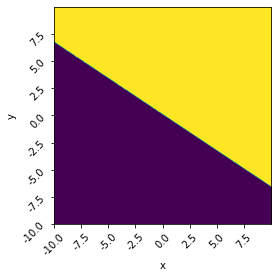

In [51]:
visualize(s1, 400, 0.05)

Text(0, 0.5, 'y')

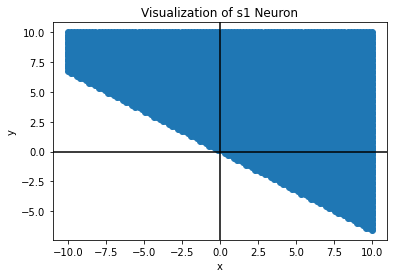

In [52]:
size = 100
X = []
Y = []

for y in np.linspace(-10, 10, size):
	for x in np.linspace(-10, 10, size):
		if s1.evaluate((x, y)):
			X.append(x)
			Y.append(y)

plt.title("Visualization of s1 Neuron")
plt.scatter(X, Y)
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.xlabel("x")
plt.ylabel("y")


In [53]:
l1 = mlp.Layer(N, 2, mlp.sigmoid)
l1.evaluate(pc.data['x'].to_list())

[0.4535465408555503,
 0.3722543312164921,
 0.7259314443215944,
 0.4306595887641788,
 0.7936949898308295,
 0.7504935265126387,
 0.5287884813493817,
 0.44107675688918696,
 0.36760168209767724,
 0.26826718691193535,
 0.7789857956108802,
 0.6215399704082233,
 0.25740656204110646,
 0.37283235077628113,
 0.7072477642703532,
 0.4967703947287987,
 0.5019594790820501,
 0.47238936316035224,
 0.5833854179792337,
 0.4131896858340352,
 0.48694069851692284,
 0.4452430353449658,
 0.31065622548040467,
 0.28221293816082343,
 0.4696503590525884,
 0.5646853081202136,
 0.5551253328787702,
 0.5226974736048979,
 0.8860143049658527,
 0.37074762433117503,
 0.3954817791065012,
 0.7163747553044101,
 0.23718926425416995,
 0.42245121154159065,
 0.47605731372975035,
 0.4007796736408947,
 0.7937638495230606,
 0.3514146707361776,
 0.4642180158451413,
 0.3026045702789805,
 0.3626884576424006,
 0.8664229723679067,
 0.6984380604820454,
 0.49738339448272173,
 0.38622610479390623,
 0.7317519385130565,
 0.4540845371065892

In [54]:
# Triangle with points (2,2), (4,4), (6,2)
line1 = mlp.Neuron([1, -1], lambda x: x >= 0, 0) # x - y >= 0
line2 = mlp.Neuron([0, 1], lambda x: x >= 0, -2) # y >= 2
line3 = mlp.Neuron([-1, -1], lambda x: x >= 0, 8) # -x -y + 8 >= 0

layer1 = mlp.Layer([line1, line2, line3])

all_neuron = mlp.Neuron([1,1,1], lambda x: x > 0, -2)
layer2 = mlp.Layer([all_neuron])

triangle = mlp.NeuralNetwork([layer1, layer2])
triangle.evaluate((1, 1))

[False]

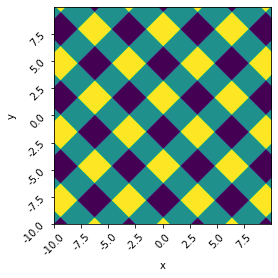

In [59]:
# visualize the output space
visualize(layer1, 400, 0.05, 'add')

In [56]:
def plot2D_network(n, x_range, y_range):
	for group in range(n.output_size):
		X = []
		Y = []
		for x in np.linspace(*x_range):
			for y in np.linspace(*y_range):
				if n.evaluate((x, y))[group]:
					X.append(x)
					Y.append(y)
		plt.scatter(X, Y)

	plt.axhline(0, color="black")
	plt.axvline(0, color="black")
	plt.xlabel("x")
	plt.ylabel("y")

In [ ]:
plot2D_network(triangle, (0, 10, 100), (0, 10, 100))

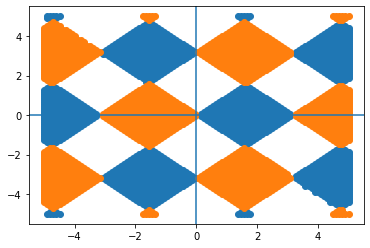

In [57]:
line1 = mlp.Neuron([1, 1], lambda x: math.sin(x) > 0, 0) # sin(x+y) > 0
line2 = mlp.Neuron([1, -1], lambda x: math.sin(x) > 0, 0) # sin(x-y) > 0

layer1 = mlp.Layer([line1, line2])

none_neuron = mlp.Neuron([-1, -1], lambda x: x > 0, 1)
all_neuron = mlp.Neuron([1, 1], lambda x: x > 0, -1)

layer2 = mlp.Layer([all_neuron, none_neuron])

random_net = mlp.NeuralNetwork([layer1, layer2])
plot2D_network(random_net, (-5, 5, 100), (-5, 5, 100))


In [58]:
# try more convex shapes 
# attempt complex shapes (chevron)
# attempt complex symbol
# linear activation functions
# possibly move to back prop later...